In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for i in zeros:
    print('num of zeros in' , i , ' = ',  sum(df[i]  == 0))

num of zeros in Glucose  =  5
num of zeros in BloodPressure  =  35
num of zeros in SkinThickness  =  227
num of zeros in BMI  =  11
num of zeros in Insulin  =  374


In [7]:
for col in zeros:  #replace Zeros With mean
    df[col] = df[col].replace(0,np.nan)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.nan,mean)

<AxesSubplot:>

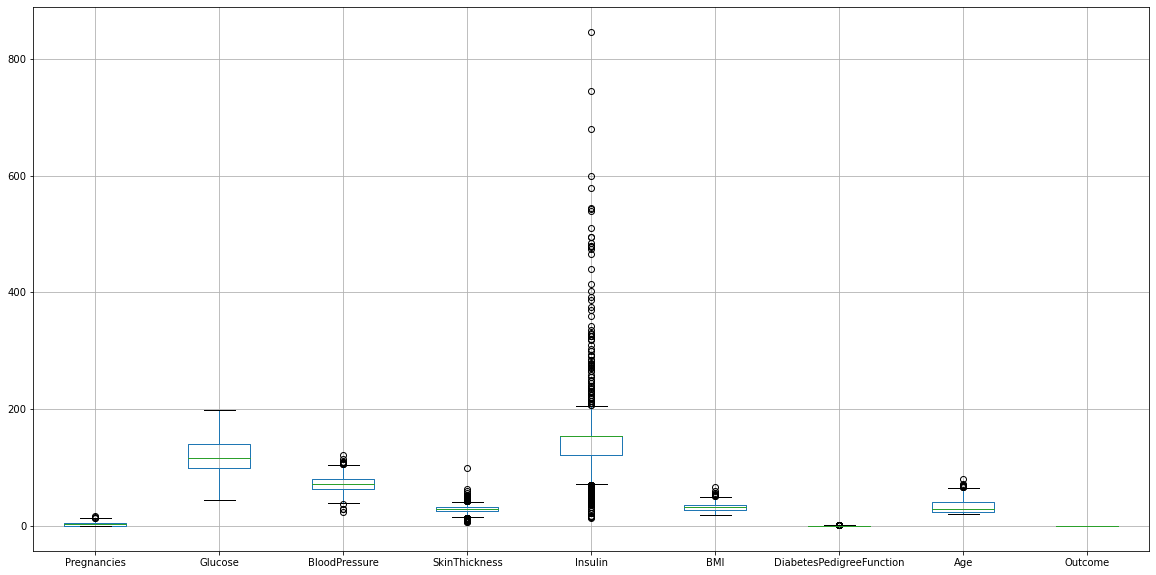

In [8]:
#Box Plot for each input variable
pd.plotting.boxplot_frame(df,figsize=(20,10))

C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

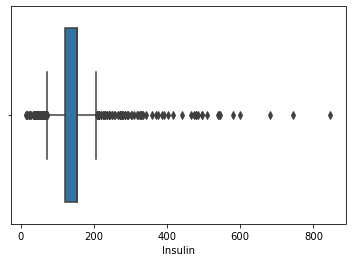

In [9]:
sns.boxplot(df['Insulin'])

In [10]:
# def drop_outlayer(df,col):    
#     print("Old Shape: ", df.shape) 
#     Q1= np.percentile(df[col], 25,interpolation = 'midpoint')
#     Q3= np.percentile(df[col], 75,interpolation = 'midpoint') 
#     IQR=Q3-Q1
#     # Upper bound
#     upper = np.where(df[col] >= (Q3+1.5*IQR))
#     # Lower bound
#     lower = np.where(df[col] <= (Q1-1.5*IQR))
#     print(upper)
#     print(lower)
#     df.drop(upper[0], inplace = True)
#     df.drop(lower[0], inplace = True)
#     print("New Shape: ", df.shape)

# drop_outlayer(df,'Insulin')
# # drop_outlayer(df,'BloodPressure')

In [11]:
# #check for missing data
# df = df.dropna()
# df.isnull().sum()

In [12]:
# #drop duplicate data instances if any
# df = df.drop_duplicates()
# df.drop_duplicates().any()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

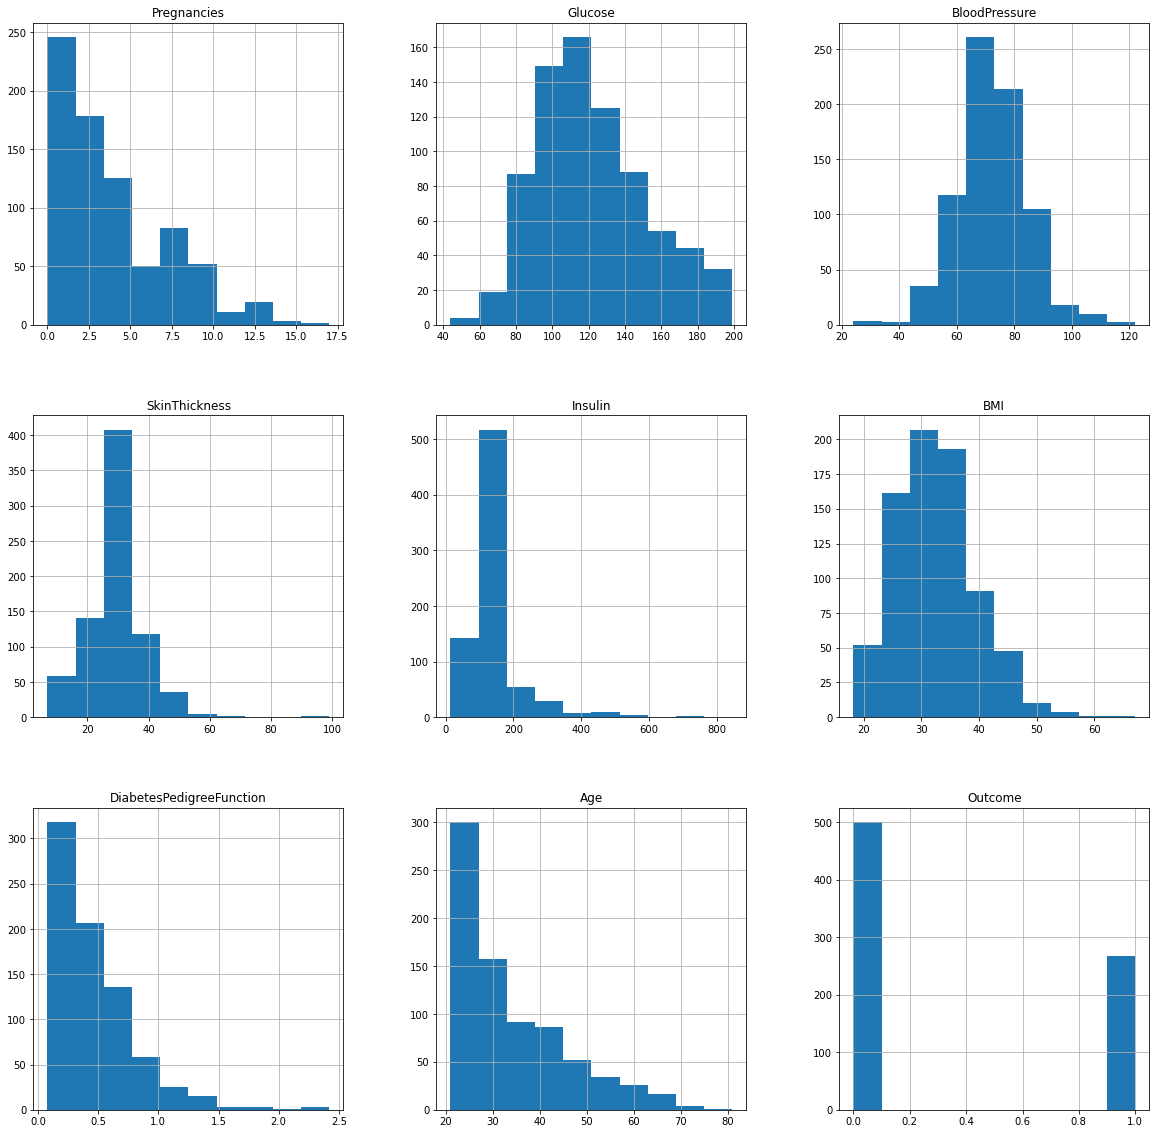

In [13]:
#Histogram Plot for each input variable

pd.plotting.hist_frame(df,figsize=(20,20))

In [14]:
# X=df[df.columns]
# target=pd.factorize(df['Outcome'])[0]

# #scatter Plot for two input variables

# pd.plotting.scatter_matrix(X,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=target)

# plt.show()

In [15]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.706000,70.920000,27.726000,141.952000,30.880200,0.429734,31.190000
1,4.865672,142.160448,75.123134,31.686567,180.149254,35.381343,0.550500,37.067164


In [16]:
corr_with_y = df.corr()['Outcome'].drop('Outcome')
corr_with_y

Pregnancies                 0.221898
Glucose                     0.492911
BloodPressure               0.165723
SkinThickness               0.214873
Insulin                     0.214278
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

In [66]:
X = df[['Pregnancies','Glucose','Insulin','BMI','Age','DiabetesPedigreeFunction','BloodPressure','SkinThickness']]
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age,DiabetesPedigreeFunction,BloodPressure,SkinThickness
0,6,148.0,155.0,33.6,50,0.627,72.0,35.0
1,1,85.0,155.0,26.6,31,0.351,66.0,29.0
2,8,183.0,155.0,23.3,32,0.672,64.0,29.0
3,1,89.0,94.0,28.1,21,0.167,66.0,23.0
4,0,137.0,168.0,43.1,33,2.288,40.0,35.0


In [67]:
y = df['Outcome']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [74]:
from sklearn.model_selection import GridSearchCV
grknn = KNeighborsClassifier()
param_grid = [
{'n_neighbors': [3, 5, 9, 11, 15], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],'leaf_size': [10,20,30,40], 'p': [2, 3, 4, 6, 7], 'metric': ['euclidean', 'manhattan', 'chebyshev']},
]
clf = GridSearchCV(grknn, param_grid,scoring='accuracy',cv=2,refit=True)
clf.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute',
                                        'auto'],
                          'leaf_size': [10, 20, 30, 40],
                          'metric': ['euclidean', 'manhattan', 'chebyshev'],
                          'n_neighbors': [3, 5, 9, 11, 15],
                          'p': [2, 3, 4, 6, 7]}],
             scoring='accuracy')

In [76]:
print(clf.best_params_)

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

clfknn = clf.best_estimator_
print('Test accuracy: %.3f' % clfknn.score(X_test, y_test))

0.757328990228013
{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'p': 2}
Test accuracy: 0.818
Test accuracy: 0.818


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,metric='manhattan',algorithm= 'ball_tree', leaf_size = 10)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                     n_neighbors=11)>

In [80]:
knn.score(x_test,y_test)

0.8181818181818182

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[92, 15],
       [13, 34]], dtype=int64)

In [82]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.7083333333333333

# My Implementation

In [33]:
from collections import Counter

import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        # Convert X_train and y_train To Numby array and Save them
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, X_test):
        # Compute distances between X_test and all examples in the training set
        distances = [self.euclidean_distance(X_test, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)[0][0]
        return most_common
    
    def euclidean_distance(self,x_test, x_train):
        # Compute Euclidean distances between X_test and all examples in the training set
        return np.sqrt(np.sum((x_test - x_train) ** 2))

    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy



In [34]:
X = df[['Pregnancies','Glucose','Insulin','BMI','Age','DiabetesPedigreeFunction','BloodPressure','SkinThickness']]
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age,DiabetesPedigreeFunction,BloodPressure,SkinThickness
0,6,148.0,155.0,33.6,50,0.627,72.0,35.0
1,1,85.0,155.0,26.6,31,0.351,66.0,29.0
2,8,183.0,155.0,23.3,32,0.672,64.0,29.0
3,1,89.0,94.0,28.1,21,0.167,66.0,23.0
4,0,137.0,168.0,43.1,33,2.288,40.0,35.0


In [35]:
y = df['Outcome'] 
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) #Split_Data

In [37]:
scaler2 = StandardScaler() #Scale_Data
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [38]:
knn2 = KNN(k=11)
knn2.fit(X_train, y_train)
predictions = knn2.predict(X_test)
print("KNN classification accuracy", knn2.accuracy(y_test, predictions))

KNN classification accuracy 0.8181818181818182


In [39]:
confusion_matrix(y_test, predictions)

array([[94, 13],
       [15, 32]], dtype=int64)

In [40]:
f1_score(y_test, predictions)

0.6956521739130436